In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='74e8341e-fbfa-4b55-8839-d0e72abd75b4', project_access_token='p-10c7f760b73d114eb0526c0ff8feaf3a3fe4958b')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [1]:
#!pip install scikit-learn --upgrade
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\wm_herrera\anaconda3\lib\site-packages (0.7.0)


In [2]:
#<!pip install xgboost --upgrade
!pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


<hr>

## Loading the .csv dataset from GitHub

In [228]:
import pandas as pd

In [229]:
#!wget --no-check-certificate --content-disposition 
df_base_for_training = pd.read_csv(r'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv')
df_base_for_training.head()

,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [230]:
#!wget --no-check-certificate --content-disposition 
df_orden_materias = pd.read_csv(r'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv')
df_orden_materias.head()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [231]:
#!wget --no-check-certificate --content-disposition 
df_tabla_conexiones = pd.read_csv(r'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv')
df_tabla_conexiones.head()

,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [232]:
#!wget --no-check-certificate --content-disposition 
df_tabla_tareas = pd.read_csv(r'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv')
df_tabla_tareas.head()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

In [233]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [234]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [235]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [236]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=False,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,88588.0,Interv. Edu.,2019 - 08,No,71.288667,13.0,2.0,0.0,15.0
1,81135.0,Educacion,2019 - 05,Si,90.000000,10.0,0.0,0.0,10.0
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si,90.606364,11.0,0.0,0.0,11.0
3,82415.0,B. I.,2019 - 06,Si,88.000000,9.0,1.0,0.0,10.0
4,90082.0,Est. Temprana,2019 - 08,No,25.454545,3.0,8.0,0.0,11.0


In [237]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
dtypes: float64(6), object(3)
memory usage: 195.3+ KB


In [238]:

dfr = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=False,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
dfr.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,88588.0,Interv. Edu.,2019 - 08,No,71.288667,13.0,2.0,0.0,15.0,28.0,371.757500,10409.21
1,81135.0,Educacion,2019 - 05,Si,90.000000,10.0,0.0,0.0,10.0,182.0,328.250934,59741.67
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si,90.606364,11.0,0.0,0.0,11.0,118.0,244.264661,28823.23
3,82415.0,B. I.,2019 - 06,Si,88.000000,9.0,1.0,0.0,10.0,32.0,543.530313,17392.97
4,90082.0,Est. Temprana,2019 - 08,No,25.454545,3.0,8.0,0.0,11.0,14.0,308.148571,4314.08


In [239]:
df=dfr
#df = df.drop(df[df['studentId']==60542].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
dtypes: float64(9), object(3)
memory usage: 253.9+ KB


De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

### Borrando finlas con valores NaN

Usando el metodo Pandas DataFrame.dropna() usted puede remover todas las filas que estan indefinidas para la columna ``Graduado``.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [240]:
# Aplicando la función para borrar todas las filas con valor NaN en la columna ``Graduado``:
df2 = df.dropna(axis='index', how='any', subset=['Graduado'])

In [241]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (SimpleImputer) (df_data_3)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los otros valores NaN vamos a usar como **ejemplo** la sustitución por la constante 0. 

Usted puede escoger cualquier estrategia que crea que es la mejor para esto :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [242]:
from sklearn.impute import SimpleImputer
import numpy as np


# Creando un objeto ``SimpleImputer``
impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='constant',  # La estrategia escogida es reemplazar por una constante
    fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)

In [243]:
# Visualizando los datos faltantes del dataset antes de la segunda transformación (df_data_2)
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

# Aplicar la transformación ``SimpleImputer`` en el conjunto de datos base
impute_zeros.fit(X=df)

# Reconstrucción del nuevo DataFrame Pandas (df_data_3)
df = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df
    ),  # El resultado SimpleImputer.transform(<<pandas dataframe>>) es una lista de listas
    columns=df.columns  # Las columnas originals deben ser conservadas en esta transformación
)

# Visualizndo los datos faltantes del dataset 
print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64

Valores nulos del dataset despues de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



### Eliminando columnas no desadas

Vamos a **demostrar** acontinuación como usar el metodo DataFrame.drop().

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [244]:
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,89685.0,Estrat. Comercial,2019 - 08,No,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,9076.34
2496,77590.0,Crianza Hijos,2019 - 06,Si,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,16082.94
2497,57623.0,Mercadotecnia,2018 - 02,Si,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,9318.69
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,986.08
2499,88250.0,Prof. Deportiva.,2019 - 08,No,78.527273,11.0,0.0,0.0,11.0,34.0,651.966765,22166.87


In [245]:
def getMateria(df,ciclo,reducido): 
    try:
      return df[df['reducido']==reducido][ciclo].values[0]
    except:
      return 'Sin clase'

for index, row in df.iterrows():
    df.at[index,'materia'] =getMateria(df_orden_materias,row.ciclo,row.reducido)
df 


,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materia
0,88588.0,Interv. Edu.,2019 - 08,No,71.288667,13.0,2.0,0.0,15.0,28.0,371.757500,10409.21,El desarrollo infantil
1,81135.0,Educacion,2019 - 05,Si,90.000000,10.0,0.0,0.0,10.0,182.0,328.250934,59741.67,Estrategias de Enseñanza
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si,90.606364,11.0,0.0,0.0,11.0,118.0,244.264661,28823.23,Mercadotecnia Estratégica
3,82415.0,B. I.,2019 - 06,Si,88.000000,9.0,1.0,0.0,10.0,32.0,543.530313,17392.97,Big data y Business Analyitics
4,90082.0,Est. Temprana,2019 - 08,No,25.454545,3.0,8.0,0.0,11.0,14.0,308.148571,4314.08,Habilidades Sociales y Emocionales
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,89685.0,Estrat. Comercial,2019 - 08,No,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,9076.34,Visión Comercial
2496,77590.0,Crianza Hijos,2019 - 06,Si,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,16082.94,"Alimentación, crecimiento y desarrollo"
2497,57623.0,Mercadotecnia,2018 - 02,Si,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,9318.69,Finanzas para el Manejo de Marcas
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,986.08,Trabajo en Equipo


In [246]:
#df2 = df.drop(columns=['reducido','studentId','ciclo','Total_Tareas','Minutos_Promedio','Tareas_Retrasadas','Minutos_Total'], inplace=False)
#df2 = df.drop(columns=['studentId'+{}iclo','Total_Tareas','Tareas_Retrasadas','reducido'], inplace=False)
#df2 = df.drop(columns=['studentId','Total_Tareas','Tareas_Retrasadas','Tareas_No_Entregadas'], inplace=False)
df = df.drop(columns=['studentId'], inplace=False)


In [247]:
df.tail()

,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materia
2495,Estrat. Comercial,2019 - 08,No,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,9076.34,Visión Comercial
2496,Crianza Hijos,2019 - 06,Si,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,16082.94,"Alimentación, crecimiento y desarrollo"
2497,Mercadotecnia,2018 - 02,Si,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,9318.69,Finanzas para el Manejo de Marcas
2498,Lider. Inst. Edu.,2017 - 05,No,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,986.08,Trabajo en Equipo
2499,Prof. Deportiva.,2019 - 08,No,78.527273,11.0,0.0,0.0,11.0,34.0,651.966765,22166.87,Innovaciones en la preparación física contempo...


### Manejando variables Categoricas

Como se menciono antes, los computadores no son buenos con las variables categoricas.

Mientras que nosotros entendemos bien las variables categoricas, es debido a un conocimiento previo quie el computador no tiene.

La mayoria de tecnicas de Machine Learning y modelso trabajan con un set limitado de datos (Tipicamente binario). 

Las redes neurales consumenda data y producen resultados en el rango de 0..1 t raramente van mas alla del alcance.

En resumen, la gran mayoria de algoritmos de machine learning aceptan data de entrada  ("training data") de donde los features son extraidos.

Basado en estos features, un modelo matematico es creado, el cual es usado para hacer una predicción o decision sin ser programado explicitamente para esa tarea.

Dado un dataset con con 2 features, vamos a dejar que encoder encuentre los valores unicos por features y transforme la data a binario usando la tecnica one-hot encoding.

In [248]:
#df = df.drop(columns=['reducido'], inplace=False)
#df = df.drop(columns=['ciclo'], inplace=False)

In [249]:
df.tail()

,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materia
2495,Estrat. Comercial,2019 - 08,No,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,9076.34,Visión Comercial
2496,Crianza Hijos,2019 - 06,Si,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,16082.94,"Alimentación, crecimiento y desarrollo"
2497,Mercadotecnia,2018 - 02,Si,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,9318.69,Finanzas para el Manejo de Marcas
2498,Lider. Inst. Edu.,2017 - 05,No,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,986.08,Trabajo en Equipo
2499,Prof. Deportiva.,2019 - 08,No,78.527273,11.0,0.0,0.0,11.0,34.0,651.966765,22166.87,Innovaciones en la preparación física contempo...


In [250]:
df.materia.value_counts().sort_values(ascending=False).head(20)


Liderazgo y Motivación                               148
Ambiente y conductas obesogénicas                     69
Planeación Estratégica                                65
Contabilidad Financiera y Presupuestos                64
Antecedentes y evolución de la alimentación           61
Alimentación, crecimiento y desarrollo                58
Big data y Business Analyitics                        54
Habilidades Sociales y Emocionales                    52
Composición corporal y metabolismo                    52
Evaluación del Aprendizaje                            49
Comunicación en Medios Digitales                      45
Creativity Workshop: pensamiento lateral aplicado     44
Mercadotecnia Estratégica                             44
Trastornos de la conducta alimentaria (TCA)           43
Marketing Analytics                                   42
Trabajo en Equipo                                     40
Gestión de las Adquisiciones                          39
Lenguaje                       

In [251]:
top10_m=[x for x in df.materia.value_counts().sort_values(ascending=False).head(10).index]
top10_m

['Liderazgo y Motivación',
 'Ambiente y conductas obesogénicas',
 'Planeación Estratégica',
 'Contabilidad Financiera y Presupuestos',
 'Antecedentes y evolución de la alimentación',
 'Alimentación, crecimiento y desarrollo',
 'Big data y Business Analyitics',
 'Habilidades Sociales y Emocionales',
 'Composición corporal y metabolismo',
 'Evaluación del Aprendizaje']

In [252]:
i=0
top10_ml=[]
for label in top10_m:
    i=i+1
    nlabel='mat_'+str(i)
    top10_ml.append(nlabel)
    df[nlabel]=np.where(df.materia==label,1,0)


df[['materia']+top10_ml].head(30)



,materia,mat_1,mat_2,mat_3,mat_4,mat_5,mat_6,mat_7,mat_8,mat_9,mat_10
0,El desarrollo infantil,0,0,0,0,0,0,0,0,0,0
1,Estrategias de Enseñanza,0,0,0,0,0,0,0,0,0,0
2,Mercadotecnia Estratégica,0,0,0,0,0,0,0,0,0,0
3,Big data y Business Analyitics,0,0,0,0,0,0,1,0,0,0
4,Habilidades Sociales y Emocionales,0,0,0,0,0,0,0,1,0,0
5,Mercadotecnia Estratégica,0,0,0,0,0,0,0,0,0,0
6,Lenguaje,0,0,0,0,0,0,0,0,0,0
7,Desarrollo emprendedor de negocios,0,0,0,0,0,0,0,0,0,0
8,Comunicación en Medios Digitales,0,0,0,0,0,0,0,0,0,0
9,Marketing Analytics,0,0,0,0,0,0,0,0,0,0


In [253]:
df.reducido.value_counts().sort_values(ascending=False).head(20)


Alim. Y Nut. Salud    263
Direc. Proy.          154
Educacion             132
Est. Temprana         115
Big Data               96
Hab. Geren.            85
E. Lectoescritura      79
Mercadotecnia          68
Planeacion Estrat.     66
Lider. Inst. Edu.      64
Comp. Directivas       62
Intro. Fin             57
Ventas Estrat.         56
Admon Fin.             52
Mkt. Digital           49
Edu. Preescolar        46
Prof. Deportiva.       42
Neuromarketing         42
Adm. Salud             42
Coaching de Vida       39
Name: reducido, dtype: int64

In [254]:
top10_r=[x for x in df.reducido.value_counts().sort_values(ascending=False).head(10).index]
top10_r

['Alim. Y Nut. Salud',
 'Direc. Proy.',
 'Educacion',
 'Est. Temprana',
 'Big Data',
 'Hab. Geren.',
 'E. Lectoescritura',
 'Mercadotecnia',
 'Planeacion Estrat.',
 'Lider. Inst. Edu.']

In [255]:
i=0
top10_rl=[]
for label in top10_r:
    i=i+1
    nlabel='red_'+str(i)
    top10_rl.append(nlabel)
    df[nlabel]=np.where(df.reducido==label,1,0)


df[['reducido']+top10_rl].head(30)



,reducido,red_1,red_2,red_3,red_4,red_5,red_6,red_7,red_8,red_9,red_10
0,Interv. Edu.,0,0,0,0,0,0,0,0,0,0
1,Educacion,0,0,1,0,0,0,0,0,0,0
2,Direc. Estrat. Neg,0,0,0,0,0,0,0,0,0,0
3,B. I.,0,0,0,0,0,0,0,0,0,0
4,Est. Temprana,0,0,0,1,0,0,0,0,0,0
5,Mercadotecnia,0,0,0,0,0,0,0,1,0,0
6,E. Lectoescritura,0,0,0,0,0,0,1,0,0,0
7,Des. Neg. y Empren.,0,0,0,0,0,0,0,0,0,0
8,Neuromarketing,0,0,0,0,0,0,0,0,0,0
9,Programacion de Apps,0,0,0,0,0,0,0,0,0,0


In [256]:
df.ciclo.value_counts().sort_values(ascending=False).head(20)


2019 - 06    338
2019 - 07    334
2019 - 08    333
2019 - 05    280
2019 - 04    259
2019 - 03    160
2019 - 01    144
2019 - 02    128
2018 - 08     93
2018 - 07     58
2018 - 06     48
2018 - 02     44
2018 - 05     38
2017 - 07     35
2017 - 05     34
2018 - 03     31
2018 - 01     30
2018 - 04     28
2017 - 08     26
2017 - 04     22
Name: ciclo, dtype: int64

In [258]:
top10_c=[x for x in df.ciclo.value_counts().sort_values(ascending=False).head(10).index]
top10_c

['2019 - 06',
 '2019 - 07',
 '2019 - 08',
 '2019 - 05',
 '2019 - 04',
 '2019 - 03',
 '2019 - 01',
 '2019 - 02',
 '2018 - 08',
 '2018 - 07']

In [259]:
i=0
top10_cl=[]
for label in top10_c:
    i=i+1
    nlabel='cic_'+str(i)
    top10_cl.append(nlabel)
    df[nlabel]=np.where(df.ciclo==label,1,0)


df[['ciclo']+top10_cl].head(30)



,ciclo,cic_1,cic_2,cic_3,cic_4,cic_5,cic_6,cic_7,cic_8,cic_9,cic_10
0,2019 - 08,0,0,1,0,0,0,0,0,0,0
1,2019 - 05,0,0,0,1,0,0,0,0,0,0
2,2019 - 05,0,0,0,1,0,0,0,0,0,0
3,2019 - 06,1,0,0,0,0,0,0,0,0,0
4,2019 - 08,0,0,1,0,0,0,0,0,0,0
5,2017 - 06,0,0,0,0,0,0,0,0,0,0
6,2019 - 05,0,0,0,1,0,0,0,0,0,0
7,2019 - 03,0,0,0,0,0,1,0,0,0,0
8,2019 - 01,0,0,0,0,0,0,1,0,0,0
9,2019 - 05,0,0,0,1,0,0,0,0,0,0


In [260]:
df = df.drop(columns=['materia','reducido','ciclo'], inplace=False)

In [261]:
df.tail()

,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,mat_1,...,cic_1,cic_2,cic_3,cic_4,cic_5,cic_6,cic_7,cic_8,cic_9,cic_10
2495,No,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,9076.34,0,...,0,0,1,0,0,0,0,0,0,0
2496,Si,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,16082.94,0,...,1,0,0,0,0,0,0,0,0,0
2497,Si,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,9318.69,0,...,0,0,0,0,0,0,0,0,0,0
2498,No,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,986.08,0,...,0,0,0,0,0,0,0,0,0,0
2499,No,78.527273,11.0,0.0,0.0,11.0,34.0,651.966765,22166.87,0,...,0,0,1,0,0,0,0,0,0,0


In [262]:
df3 = df;
df3.tail()

,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,mat_1,...,cic_1,cic_2,cic_3,cic_4,cic_5,cic_6,cic_7,cic_8,cic_9,cic_10
2495,No,79.457000,10.0,0.0,0.0,10.0,56.0,162.077500,9076.34,0,...,0,0,1,0,0,0,0,0,0,0
2496,Si,88.333571,14.0,0.0,0.0,14.0,36.0,446.748333,16082.94,0,...,1,0,0,0,0,0,0,0,0,0
2497,Si,85.555556,9.0,0.0,0.0,9.0,71.0,131.249155,9318.69,0,...,0,0,0,0,0,0,0,0,0,0
2498,No,0.000000,0.0,10.0,0.0,10.0,7.0,140.868571,986.08,0,...,0,0,0,0,0,0,0,0,0,0
2499,No,78.527273,11.0,0.0,0.0,11.0,34.0,651.966765,22166.87,0,...,0,0,1,0,0,0,0,0,0,0


<hr>

## Entrenando un clasificador basado  en un Árbol de Decisión

### Seleccionando FEATURES y definiendo la variable TARGET

In [264]:
df3.columns

Index(['Graduado', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'mat_1', 'mat_2',
       'mat_3', 'mat_4', 'mat_5', 'mat_6', 'mat_7', 'mat_8', 'mat_9', 'mat_10',
       'red_1', 'red_2', 'red_3', 'red_4', 'red_5', 'red_6', 'red_7', 'red_8',
       'red_9', 'red_10', 'cic_1', 'cic_2', 'cic_3', 'cic_4', 'cic_5', 'cic_6',
       'cic_7', 'cic_8', 'cic_9', 'cic_10'],
      dtype='object')

In [265]:
caracteristicas= [ 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'mat_2',
       'mat_3', 'mat_5', 'mat_6', 'mat_7', 'mat_8', 'mat_9',
       'red_1', 'red_2', 'red_3', 'red_4', 'red_6', 'red_7', 'red_8',
       ]

In [335]:
caracteristicas= ['Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total', 'mat_2',
       'mat_3', 'mat_5', 'mat_8',
       'red_1', 'red_2', 'red_3', 'red_4', 'red_6', 'red_7', 'red_8',
        'red_10', 'cic_1', 'cic_2', 'cic_3', 'cic_4', 'cic_5', 'cic_6',
       'cic_7']

In [336]:
features = df3[
  caracteristicas
]
target = df3['Graduado']  ## No cambie la variable target!

In [337]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df3, title="Pandas Profiling Report")
#profile

### Dividiendo nuestro dataset en set de Entrenamiento y Pruebas

In [338]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Entrenando un modelo ``DecisionTreeClassifier()``

### Haciendo predicciones del Sample Test

### Analice la calidad del modelo a través de la matriz de confusión

In [339]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

          No       0.81      0.79      0.80       249
          Si       0.80      0.81      0.80       251

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500

Exactitud XGBClassifier: 80.2%


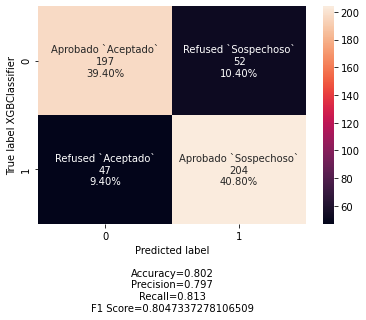

In [340]:
x_train=X_train
x_test=X_test 


from xgboost import XGBClassifier

clf =XGBClassifier(objective='binary:logistic',max_depth=4)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud XGBClassifier: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))


y_pred = predictions

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['Aprobado `Aceptado`', 'Refused `Sospechoso`', 'Refused `Aceptado`', 'Aprobado `Sospechoso`']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt='')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label XGBClassifier')
plt.xlabel('Predicted label' + stats_text)
plt.show()


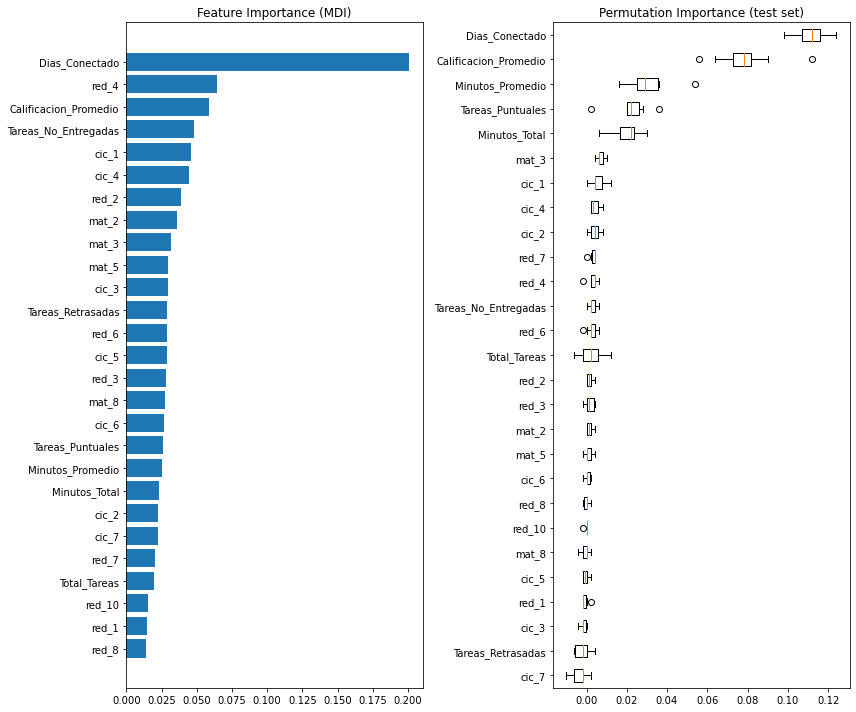

Feature: 0, Score: 0.05887
Feature: 1, Score: 0.02606
Feature: 2, Score: 0.04794
Feature: 3, Score: 0.02912
Feature: 4, Score: 0.01969
Feature: 5, Score: 0.20064
Feature: 6, Score: 0.02520
Feature: 7, Score: 0.02316
Feature: 8, Score: 0.03589
Feature: 9, Score: 0.03186
Feature: 10, Score: 0.02969
Feature: 11, Score: 0.02748
Feature: 12, Score: 0.01459
Feature: 13, Score: 0.03865
Feature: 14, Score: 0.02821
Feature: 15, Score: 0.06463
Feature: 16, Score: 0.02858
Feature: 17, Score: 0.02048
Feature: 18, Score: 0.01393
Feature: 19, Score: 0.01534
Feature: 20, Score: 0.04613
Feature: 21, Score: 0.02267
Feature: 22, Score: 0.02930
Feature: 23, Score: 0.04421
Feature: 24, Score: 0.02857
Feature: 25, Score: 0.02679
Feature: 26, Score: 0.02234


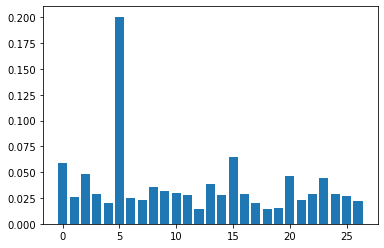

Features sorted by their score:
[(0.2006, 'Dias_Conectado'), (0.0646, 'red_4'), (0.0589, 'Calificacion_Promedio'), (0.0479, 'Tareas_No_Entregadas'), (0.0461, 'cic_1'), (0.0442, 'cic_4'), (0.0387, 'red_2'), (0.0359, 'mat_2'), (0.0319, 'mat_3'), (0.0297, 'mat_5'), (0.0293, 'cic_3'), (0.0291, 'Tareas_Retrasadas'), (0.0286, 'red_6'), (0.0286, 'cic_5'), (0.0282, 'red_3'), (0.0275, 'mat_8'), (0.0268, 'cic_6'), (0.0261, 'Tareas_Puntuales'), (0.0252, 'Minutos_Promedio'), (0.0232, 'Minutos_Total'), (0.0227, 'cic_2'), (0.0223, 'cic_7'), (0.0205, 'red_7'), (0.0197, 'Total_Tareas'), (0.0153, 'red_10'), (0.0146, 'red_1'), (0.0139, 'red_8')]


In [341]:


from sklearn.inspection import permutation_importance

feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(caracteristicas)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(caracteristicas)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), importance), caracteristicas), reverse=True))

<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [342]:
#!wget --no-check-certificate --content-disposition 
df_to_be_predicted = pd.read_csv(r'https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv')
df_to_be_predicted.head()

,studentId,reducido,ciclo
0,69195.0,Admon Fin.,2018 - 08
1,65627.0,Direc. Proy.,2018 - 06
2,86643.0,Inn. Diseno Edu.,2019 - 07
3,80610.0,Alim. Y Nut. Salud,2019 - 05
4,85524.0,Hab. Geren.,2019 - 07


In [343]:
# Uniendo los dataset
dfn = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=False,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

dfrn = pd.merge(
    dfn, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=False,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
dfrn.head()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,69195.0,Admon Fin.,2018 - 08,92.800000,5.0,0.0,0.0,5.0,62.0,212.328226,13164.35
1,65627.0,Direc. Proy.,2018 - 06,18.888889,2.0,7.0,0.0,9.0,9.0,250.632222,2255.69
2,86643.0,Inn. Diseno Edu.,2019 - 07,85.900000,10.0,0.0,0.0,10.0,48.0,550.820625,26439.39
3,80610.0,Alim. Y Nut. Salud,2019 - 05,66.133333,12.0,3.0,0.0,15.0,21.0,183.564762,3854.86
4,85524.0,Hab. Geren.,2019 - 07,98.000000,10.0,0.0,0.0,10.0,88.0,80.556818,7089.00


In [344]:
for index, row in dfrn.iterrows():
    dfrn.at[index,'materia'] =getMateria(df_orden_materias,row.ciclo,row.reducido)
dfrn 


,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materia
0,69195.0,Admon Fin.,2018 - 08,92.800000,5.0,0.0,0.0,5.0,62.0,212.328226,13164.35,Decisión y Análisis de Inversión
1,65627.0,Direc. Proy.,2018 - 06,18.888889,2.0,7.0,0.0,9.0,9.0,250.632222,2255.69,Gestión de las Adquisiciones
2,86643.0,Inn. Diseno Edu.,2019 - 07,85.900000,10.0,0.0,0.0,10.0,48.0,550.820625,26439.39,Proceso de enseñanza-aprendizaje
3,80610.0,Alim. Y Nut. Salud,2019 - 05,66.133333,12.0,3.0,0.0,15.0,21.0,183.564762,3854.86,Trastornos de la conducta alimentaria (TCA)
4,85524.0,Hab. Geren.,2019 - 07,98.000000,10.0,0.0,0.0,10.0,88.0,80.556818,7089.00,Liderazgo y Motivación
...,...,...,...,...,...,...,...,...,...,...,...,...
995,79594.0,Diagn. Psicoped.,2019 - 05,87.667000,10.0,0.0,0.0,10.0,47.0,253.747234,11926.12,Desarrollo humano
996,69470.0,Ventas Estrat.,2018 - 08,64.400909,9.0,2.0,0.0,11.0,18.0,147.032778,2646.59,Mercadotecnia Estratégica
997,72921.0,Big Data,2019 - 02,81.000000,10.0,0.0,0.0,10.0,26.0,310.511154,8073.29,Liderazgo y Motivación
998,80608.0,Interv. Psicoped,2019 - 05,93.600000,10.0,0.0,0.0,10.0,79.0,160.656076,12691.83,Desarrollo humano


In [345]:
top10_m

['Liderazgo y Motivación',
 'Ambiente y conductas obesogénicas',
 'Planeación Estratégica',
 'Contabilidad Financiera y Presupuestos',
 'Antecedentes y evolución de la alimentación',
 'Alimentación, crecimiento y desarrollo',
 'Big data y Business Analyitics',
 'Habilidades Sociales y Emocionales',
 'Composición corporal y metabolismo',
 'Evaluación del Aprendizaje']

In [346]:
top10_r

['Alim. Y Nut. Salud',
 'Direc. Proy.',
 'Educacion',
 'Est. Temprana',
 'Big Data',
 'Hab. Geren.',
 'E. Lectoescritura',
 'Mercadotecnia',
 'Planeacion Estrat.',
 'Lider. Inst. Edu.']

In [347]:
top10_c

['2019 - 06',
 '2019 - 07',
 '2019 - 08',
 '2019 - 05',
 '2019 - 04',
 '2019 - 03',
 '2019 - 01',
 '2019 - 02',
 '2018 - 08',
 '2018 - 07']

In [348]:
i=0
top10_ml=[]
for label in top10_m:
    i=i+1
    nlabel='mat_'+str(i)
    top10_ml.append(nlabel)
    dfrn[nlabel]=np.where(dfrn.materia==label,1,0)

i=0
top10_rl=[]
for label in top10_r:
    i=i+1
    nlabel='red_'+str(i)
    top10_rl.append(nlabel)
    dfrn[nlabel]=np.where(dfrn.reducido==label,1,0)

i=0
top10_cl=[]
for label in top10_c:
    i=i+1
    nlabel='cic_'+str(i)
    top10_cl.append(nlabel)
    dfrn[nlabel]=np.where(dfrn.ciclo==label,1,0)

 



dfrn = dfrn.drop(columns=['reducido'], inplace=False)
dfrn = dfrn.drop(columns=['ciclo'], inplace=False)
dfrn = dfrn.drop(columns=['studentId'], inplace=False)
dfrn = dfrn.drop(columns=['materia'], inplace=False)

#dfrn[['materia']+top10_ml].head(30)


In [349]:
dfrn.head()

,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,mat_1,mat_2,...,cic_1,cic_2,cic_3,cic_4,cic_5,cic_6,cic_7,cic_8,cic_9,cic_10
0,92.800000,5.0,0.0,0.0,5.0,62.0,212.328226,13164.35,0,0,...,0,0,0,0,0,0,0,0,1,0
1,18.888889,2.0,7.0,0.0,9.0,9.0,250.632222,2255.69,0,0,...,0,0,0,0,0,0,0,0,0,0
2,85.900000,10.0,0.0,0.0,10.0,48.0,550.820625,26439.39,0,0,...,0,1,0,0,0,0,0,0,0,0
3,66.133333,12.0,3.0,0.0,15.0,21.0,183.564762,3854.86,0,0,...,0,0,0,1,0,0,0,0,0,0
4,98.000000,10.0,0.0,0.0,10.0,88.0,80.556818,7089.00,1,0,...,0,1,0,0,0,0,0,0,0,0


In [350]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              1000 non-null   float64
 1   reducido               1000 non-null   object 
 2   ciclo                  1000 non-null   object 
 3   Calificacion_Promedio  1000 non-null   float64
 4   Tareas_Puntuales       1000 non-null   float64
 5   Tareas_No_Entregadas   1000 non-null   float64
 6   Tareas_Retrasadas      1000 non-null   float64
 7   Total_Tareas           1000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 70.3+ KB


In [351]:
dfrn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Calificacion_Promedio  1000 non-null   float64
 1   Tareas_Puntuales       1000 non-null   float64
 2   Tareas_No_Entregadas   1000 non-null   float64
 3   Tareas_Retrasadas      1000 non-null   float64
 4   Total_Tareas           1000 non-null   float64
 5   Dias_Conectado         1000 non-null   float64
 6   Minutos_Promedio       1000 non-null   float64
 7   Minutos_Total          1000 non-null   float64
 8   mat_1                  1000 non-null   int32  
 9   mat_2                  1000 non-null   int32  
 10  mat_3                  1000 non-null   int32  
 11  mat_4                  1000 non-null   int32  
 12  mat_5                  1000 non-null   int32  
 13  mat_6                  1000 non-null   int32  
 14  mat_7                  1000 non-null   int32  
 15  mat_8

In [354]:
dfrn.columns

Index(['Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas',
       'Tareas_Retrasadas', 'Total_Tareas', 'Dias_Conectado',
       'Minutos_Promedio', 'Minutos_Total', 'mat_1', 'mat_2', 'mat_3', 'mat_4',
       'mat_5', 'mat_6', 'mat_7', 'mat_8', 'mat_9', 'mat_10', 'red_1', 'red_2',
       'red_3', 'red_4', 'red_5', 'red_6', 'red_7', 'red_8', 'red_9', 'red_10',
       'cic_1', 'cic_2', 'cic_3', 'cic_4', 'cic_5', 'cic_6', 'cic_7', 'cic_8',
       'cic_9', 'cic_10'],
      dtype='object')

In [355]:
y_predn = clf.predict(dfrn[
    caracteristicas
])

print(y_predn)  


['Si' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No'
 'Si' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No'
 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'No'
 'Si' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'Si'
 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si'
 'Si' 'No' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'No'
 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'No'
 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si'
 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si'
 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si'
 'Si' 

### Guardando los resultados de la predicción en un archivo csv

In [356]:
np.savetxt("results.csv", y_predn, delimiter=",", fmt='%s')

In [226]:

y_predn.to_csv("results.csv",index=False)

import pandas as pd 
df = pd.DataFrame(np_array)
df.to_csv("file_path.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
